# A Video that's likely helpful

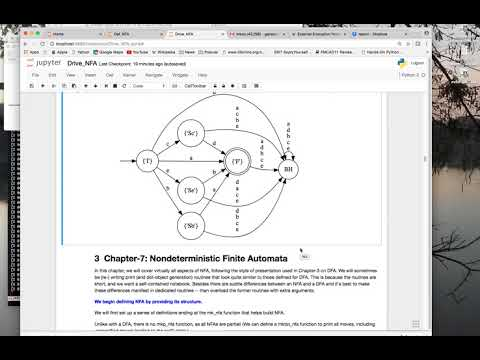

In [1]:
# This is a potentially helpful video from long ago... watch it if you've not, before.
from IPython.display import YouTubeVideo
YouTubeVideo('xjFtLF95uBc')

# Asg-3 imports 


In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_classes)
help(listminus)
help(bash_1)
help(mk_rep_eqc)
help(F_of)
help(rep_of_s)
help(q0_of)
help(Delta_of)
help(mk_state_eqc_name)

You may use any of these help commands:
help(mk_nfa)
help(totalize_nfa)
help(step_nfa)
help(run_nfa)
help(ec_step_nfa)
help(Eclosure)
help(Echelp)
help(accept

# Problem 1a (SV): Design an NFA for $\{0,1\}^* 1 0$ ("Ends 10")

## It will be a 3-state NFA, and name the states as I, S0, and F


In [3]:
# SOLUTION

nfaEnds10 = md2mc('''
NFA 
I  : 0|1 -> I  !! Stay at I till ending pattern seen
I  : 1   -> S0 !! After a 0, attain S0
S0 : 0   -> F  !! Final state F 
''')

# Problem 1b (SV): Determine States in Animation

Put the above NFA in animation, and note down the set of states attained
after the DFA has seen every character in 1010. More detailed instructions follow.

## 1b(i): Execute the cell below and follow the bulleted instructions

* When the animation pane comes up, type in 1010 and click Animate

* Then click the ">|" button, which is for single-stepping

* Note down the results as you single-step, and fill answers in 1b(ii) below


In [4]:
AnimateNFA(nfaEnds10, FuseEdges=False)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

## 1b(ii) : Provide these answers based on single-stepping the animation

### SET of states before consuming any of 1010 = ..fill..

### SET of states AFTER "1" and before "010"  = ..fill..

### SET of states AFTER "10" and before "10"  = ..fill..

### SET of states AFTER "101" and before "0"  = ..fill..

### SET of states AFTER "1010"   = ..fill..

# Problem 1c (SV): Convert the NFA to a DFA and answer

Convert the NFA to a DFA by the command below, and answer 1c's question below

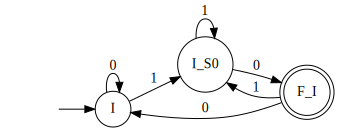

In [5]:
dotObj_dfa(nfa2dfa(nfaEnds10, STATENAME_MAXSIZE=50), STATENAME_MAXSIZE=50)

#### 1c's question-1: State DFA is in after 1010 = ...DFA STATE...

... one sentence ...

#### 1c's question-2: Set of states NFA is in after 1010 (last ans of 1b(ii) ) = ...SET of NFA States...

... one sentence ...

#### Do the above match? (i.e. ...DFA STATE... = ...SET of NFA States...) ?

... one sentence ...

#### Reason that the above should match? 

... one sentence ...

# Problem 2 (XL): Design an NFA for $\{\varepsilon, 0\}$ 
### It will be a 2-state NFA with an IF state and a final state (call that final state "F2" )

In [6]:
nfaEps0 = md2mc('''
NFA 
IF : 0 -> F2
''')

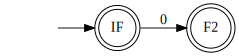

In [7]:
dotObj_nfa(nfaEps0)

# A tutorial on Concatenating NFA

Watch this video, then do Xinyi Li's question.

To watch the video separately in Youtube in large size, 
visit https://youtu.be/VWyOT1uYfIc

Otherwise just run the command below!

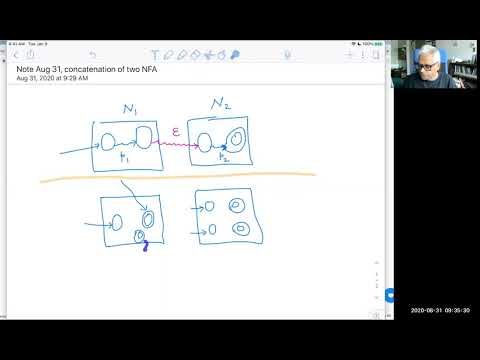

In [16]:
# NFA Concatenation
from IPython.display import YouTubeVideo
YouTubeVideo('VWyOT1uYfIc')

# Problem 2a (XL): Develop a Concatenation NFA

## Concatenate nfaEnds10 and nfaEps0 to obtain NFAEnds10Eps0

### We follow these steps

### Roughly, we are bridging from "every final state of N1 to every initial of N2 via eps "

#### More specifically, we are going to pool the transitions of the two machines after making some changes to state names

* If nfaEnds10 has an IF state, rename it to "IX" (not final, still initial)
  - In general, a similar procedure is needed for every such IF state
  
* If nfaEnds10 has an F state (that is not an I state), rename it to "T1"
  - In general, a similar procedure is needed for every such F state
  
* If nfaEps0 has an IF state, rename it to F3 (a final state that is no longer initial)
  - In general, a similar procedure is needed for every IF state.

* If nfaEps0 has an I state (that is not an IF state), rename it to "T2" (not "I" anymore)
  - In general, a similar procedure is needed for every I state.

* Introduce a "bridge" transition labeled with Epsilon that connects "what was an F-state" of nfaEnds10 to "what was an I-state" of nfaEps0



# Problem 2b (XL): Show the full Concatenation NFA below


In [8]:
# Here is the resulting NFA

NFAEnds10Eps0 = md2mc('''
NFA 

!!---- put NFA 1's transitions below, after the aforesaid renamings ----

I  : 0 | 1 -> I
I  : 1     -> A1
A1 : 0     -> T1

!!--- put the "bridge" transition below
T1 : '' -> F3

!!--- put NFA 2's transitions below, after the aforesaid renamings ----
F3    : 0 -> F2

''')

## Problem 2b (XL): Draw the concat NFA and convert to a DFA

... The below THREE commands finish your answer to XL's question ...


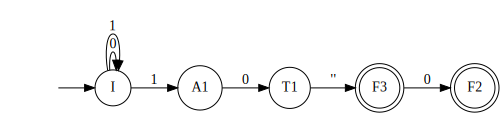

In [9]:
# command-1
dotObj_nfa(NFAEnds10Eps0)

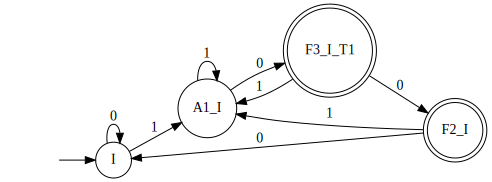

In [10]:
# command-2

dotObj_dfa(nfa2dfa(NFAEnds10Eps0, STATENAME_MAXSIZE=50), STATENAME_MAXSIZE=50)

In [11]:
# Let us see its internal representation -- this may give you hints for answering your question

# command-3

NFAEnds10Eps0

{'Q': {'A1', 'F2', 'F3', 'I', 'T1'},
 'Sigma': {'0', '1'},
 'Delta': {('I', '0'): {'I'},
  ('I', '1'): {'A1', 'I'},
  ('A1', '0'): {'T1'},
  ('T1', ''): {'F3'},
  ('F3', '0'): {'F2'}},
 'Q0': {'I'},
 'F': {'F2', 'F3'}}

# Problem 3 (LT): Explain the NFA2DFA algorithm

Below, you must explain the states of the DFA that resulted from converting the
NFA to DFA using subset construction. For each question, your answer must be of
the following form:

* Currently the NFA is in a *set* of states, say S1. That is already an E-closed state.

* Let S1 be {s11, s12} for example. (Notice the upper and lower cases.)

* I considered a '0' transition

* Upon a '0', s11 when to set of states S11, s12 went to set of states S12, and so on.

* I performed E-Closure of the states in S11 and that resulted in S11c

* Similarly, I performed E-Closure of the states in S12 and that resulted in S12c

* Then I unioned S11c and S12c and called it S2

* S2 is now an E-closed set of states

* Thus, I arrive at a single NFA state corresponding to 
  - S1 going upon '0' to S2

 
## QUESTIONS FOR YOU TO ANSWER IN THE ABOVE MANNER

### Why did state I arise in the DFA?

...Your answer in the above-style bulletted steps...

### Why did state A1_I arise in the DFA?

...Your answer in the above-style bulletted steps...


### Why did F3_I_T1 arise?

...Your answer in the above-style bulletted steps...


### Explain in detail why A1_I went upon a '0' to F3_I_T1 (include all the E-closure steps)

...Your answer in the above-style bulletted steps...


### Why did F2_I arise?


...Your answer in the above-style bulletted steps...


# Problem 4 (AR): Studying NFA via Widgets 

Run the cells below. There are questions at the end.

In [12]:
help(accepts_nfa)

Help on function accepts_nfa in module jove.Def_NFA:

accepts_nfa(N, s, chatty=False)
    NFA acceptance.
    Input : N : given NFA
            s : given string
            chatty : Boolean (prints accepting path,
                     which is the state-sets encountered).



In [13]:
accepts_nfa(NFAEnds10Eps0, "0100100", chatty=True)

States reached =  {'I'}
States reached =  {'I', 'A1'}
States reached =  {'F3', 'I', 'T1'}
States reached =  {'I', 'F2'}
States reached =  {'I', 'A1'}
States reached =  {'F3', 'I', 'T1'}
States reached =  {'I', 'F2'}
NFA accepts '0100100' by reaching {'I', 'F2'}


True

## Explain why 0100100 was actually accepted by {I,F2} ?

### Two answers are required

#### ANSWER-1

... A one-sentence answer capturing which sets of NFA states become DFA's final states...

#### ANSWER-2

... Point out which tokens died. That is, consider the set of states {'A1','I'}. Did any one of these states, upon '0' (or a '1') result in an empty next set of states? Explain!

# Setup to run NFA interactively via widgets

We have three NFA to play with


In [14]:
import ipywidgets as wdg
def run_nfa_slider(N, s, n):
    """Run NFA N from N["Q0"] (which is a set..) on substring s[0:n]
    """
    S = N["Q0"] 
    if (n > len(s)):
        n = len(s)
    print("string = ", s[0:n])
    run_nfa(N, S, s[0:n], True)
    
def run_nfa_int(N1, N2, N3):
    """Run interactively from the given NFA .. from {q0} 
       on input string's substring
       as picked by slider.
    """
    inp = input("Please provide string: ")
    wdg.interact(run_nfa_slider, N = {'N1': N1, 'N2': N2, 'N3': N3}, 
                 s = inp, n=(0,32))
    
def test_run_nfa_int(N1, N2, N3):
    """Test the interactive run of NFA.
    """
    run_nfa_int(N1, N2, N3)

 

### General plan

Provide a string of 0's and 1's. Then you can use the pull-down to pick the NFA
to test, and the slider to incrementally consume more of the input string

## Answer where N1 reached upon feeding
### s = 0100100100100100
### slide "n" set to 12

... Your answer ...

### Answer for N2 for the same settings as above

... Your answer ...

### Answer for N3 for the same settings as above

... Your answer ...




In [15]:
test_run_nfa_int(nfaEnds10, nfaEps0, NFAEnds10Eps0)

Please provide string: 0100100100100100


interactive(children=(Dropdown(description='N', options={'N1': {'Q': {'I', 'S0', 'F'}, 'Sigma': {'0', '1'}, 'D…